# Figure 3

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(style="whitegrid")

## Beautifying Figure 3

In [10]:
confusion_matrix={
	"XHMM":
		[[746801, 2556, 14310],
		[7149, 56, 67],
		[1894, 12, 119]]
		,
	"DECoNT_XHMM":
		[[749417, 2567, 14342],
		[4877, 51, 70],
		[1550, 6, 84]]
		,
	"CONIFER":
		[[188992, 609, 3590],
		[0, 50, 0],
		[0, 0, 0]]
		,
	"DECoNT_CONIFER":
		[[188992, 619, 3590],
		[0, 40, 0],
		[0, 0, 0]]
		,
	"CODEX2":
		[[481333, 1704, 8882],
		[130138, 362, 2161],
		[144373, 558, 3453]]
		,
	"DECoNT_CODEX2":
		[[655677, 2266, 12338],
		[54791, 228, 1146],
		[45376, 130, 1012]]
		,
	"ECOLE":
		[[748390, 2224, 13165],
		[4197, 359, 604],
		[3257, 41, 727]]
		,
	"ECOLE_EXPERT":
		[[ 751069, 1136, 7931],
		[ 254, 1435, 129],
		[ 4521, 53, 6436]]
}

In [6]:
def del_npv(method):
    FN = (confusion_matrix[method][0][2]+confusion_matrix[method][1][2])
    TN = (confusion_matrix[method][0][0] + confusion_matrix[method][0][1]) + (confusion_matrix[method][1][0] + confusion_matrix[method][1][1])
    return TN/(TN+FN)

def dup_npv(method):
    FN = (confusion_matrix[method][0][1]+confusion_matrix[method][2][1])
    TN = (confusion_matrix[method][0][0] + confusion_matrix[method][0][2]) + (confusion_matrix[method][2][0] + confusion_matrix[method][2][2])
    return TN/(TN+FN)

def overall_npv(method):
    return (del_npv(method)+dup_npv(method))/2

In [11]:
XHMM =  [0.059, 0.008, 0.034, 0.008, 0.021, 0.015, 0.014, 0.012, 0.021, del_npv("XHMM"),dup_npv("XHMM"),overall_npv("XHMM")]
CONIFER = [0.000, 1.000, 0.500, 0.000, 0.076, 0.038, 0.000, 0.141, 0.071, del_npv("CONIFER"),dup_npv("CONIFER"),overall_npv("CONIFER")]
CODEX2 = [0.023, 0.003, 0.013, 0.238, 0.138, 0.188, 0.042, 0.006, 0.024, del_npv("CODEX2"),dup_npv("CODEX2"),overall_npv("CODEX2")]
DECoNT_XHMM = [0.051, 0.010, 0.031, 0.006, 0.019, 0.013, 0.011, 0.013, 0.018, del_npv("DECoNT_XHMM"),dup_npv("DECoNT_XHMM"),overall_npv("DECoNT_XHMM")]
DECoNT_CONIFER = [0.000, 1.000, 0.500, 0.000, 0.061, 0.031, 0.000, 0.115, 0.058, del_npv("DECoNT_CONIFER"),dup_npv("DECoNT_CONIFER"),overall_npv("DECoNT_CONIFER")]
DECoNT_CODEX2 = [0.022, 0.004, 0.013, 0.070, 0.087, 0.079, 0.033, 0.008, 0.022, del_npv("DECoNT_CODEX2"),dup_npv("DECoNT_CODEX2"),overall_npv("DECoNT_CODEX2")]
ECOLE = [0.181, 0.070, 0.126, 0.050, 0.137, 0.094, 0.078, 0.093, 0.108, del_npv("ECOLE"),dup_npv("ECOLE"),overall_npv("ECOLE")]
ECOLE_EXPERT = [0.584, 0.789, 0.687, 0.444, 0.547, 0.496, 0.504, 0.646, 0.576, del_npv("ECOLE_EXPERT"),dup_npv("ECOLE_EXPERT"),overall_npv("ECOLE_EXPERT")]

performance = {"XHMM":[XHMM,"gold"],"CONIFER":[CONIFER,"springgreen"],"CODEX2":[CODEX2,"blue"],"ECOLE":[ECOLE,"red"],"ECOLE_EXPERT":[ECOLE_EXPERT,"maroon"]}
decont_performance = {"DECoNT_XHMM":[DECoNT_XHMM,"gold"],"DECoNT_CONIFER":[DECoNT_CONIFER,"springgreen"],"DECoNT_CODEX2":[DECoNT_CODEX2,"blue"],"ECOLE":[ECOLE,"red"],"ECOLE_EXPERT":[ECOLE_EXPERT,"maroon"]}


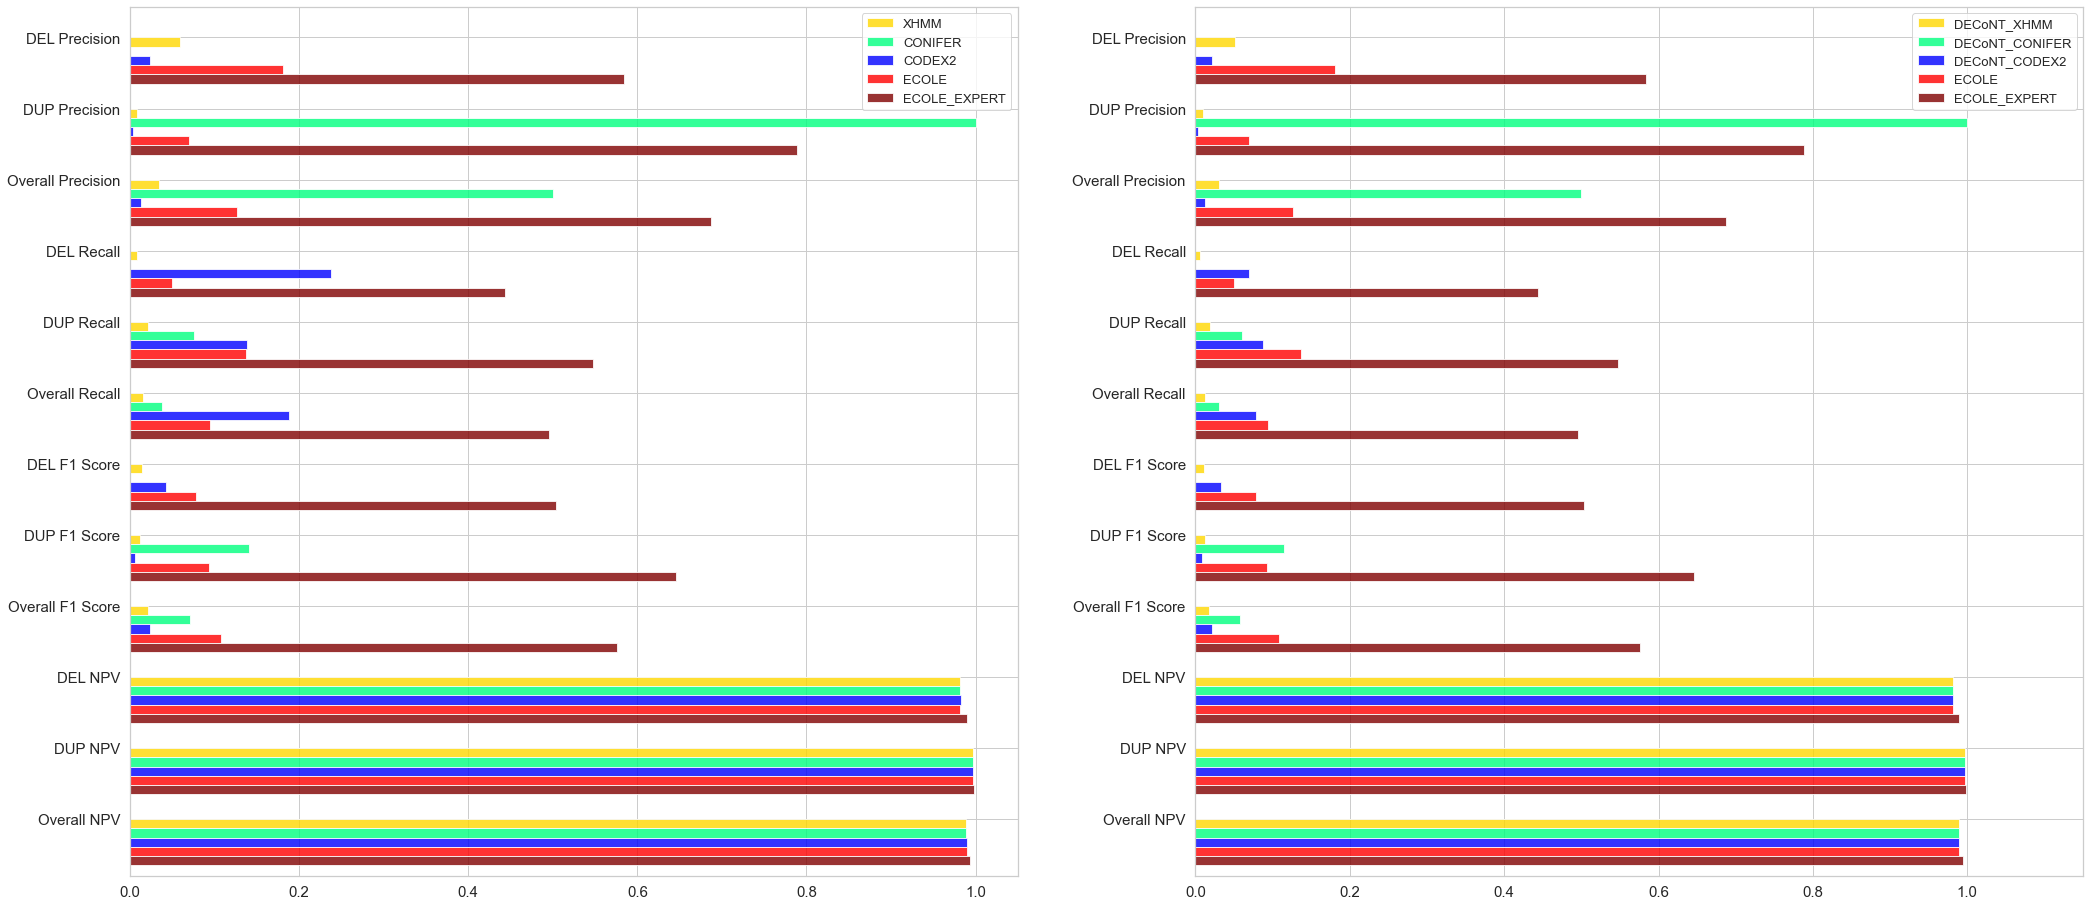

In [16]:
performanceTypes = ['DEL Precision','DUP Precision','Overall Precision','DEL Recall','DUP Recall','Overall Recall','DEL F1 Score','DUP F1 Score','Overall F1 Score','DEL NPV', "DUP NPV", "Overall NPV"]



ind = np.arange(len(performanceTypes))
width=0.13 

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(35,16))
ax1 = plt.subplot(1, 2, 1)
for i,caller in enumerate(performance.keys()):
    ax1.barh(ind-i*width, list(reversed(performance[caller][0])), width, align='center', alpha=0.8, label=caller, color=performance[caller][1]) #a horizontal bar chart (use .bar instead of .barh for vertical)
ax1.set(yticks=ind + width/2, yticklabels=list(reversed(performanceTypes)), ylim=[2*width - 1, len(performanceTypes)-0.5])
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.legend(loc="upper right",fontsize=13)

ax2 = plt.subplot(1, 2, 2, sharey=ax1)
for i,caller in enumerate(decont_performance.keys()):
    ax2.barh(ind-i*width, list(reversed(decont_performance[caller][0])), width, align='center', alpha=0.8, label=caller, color=decont_performance[caller][1]) #a horizontal bar chart (use .bar instead of .barh for vertical)
ax2.set(yticks=ind + width/2, yticklabels=list(reversed(performanceTypes)), ylim=[2*width - 1, len(performanceTypes)-0.5 ], xlim=[0,1.15])
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.legend(loc="upper right",fontsize=13)


#plt.xlabel

## CNV Distributions

In [2]:
cur_dirname = os.getcwd()
test1 = np.load(cur_dirname+'/Chaisson_et_al_test_data/HG00513_labeled_data.npy',allow_pickle=True)
test2 = np.load(cur_dirname+'/Chaisson_et_al_test_data/HG00732_labeled_data.npy',allow_pickle=True)
test3 = np.load(cur_dirname+'/Chaisson_et_al_test_data/HG00733_labeled_data.npy',allow_pickle=True)
test4 = np.load(cur_dirname+'/Chaisson_et_al_test_data/NA19240_labeled_data.npy',allow_pickle=True)
HG00513_labeled_data = test1[:,5]
HG00732_labeled_data = test2[:,5]
HG00733_labeled_data = test3[:,5]
NA19240_labeled_data = test4[:,5]

In [3]:
cur_dirname = os.getcwd()
test1 = np.load(cur_dirname+'/Chaisson_et_al_test_data/HG00513_labeled_data.npy',allow_pickle=True)
test2 = np.load(cur_dirname+'/Chaisson_et_al_test_data/HG00732_labeled_data.npy',allow_pickle=True)
test3 = np.load(cur_dirname+'/Chaisson_et_al_test_data/HG00733_labeled_data.npy',allow_pickle=True)
test4 = np.load(cur_dirname+'/Chaisson_et_al_test_data/NA19240_labeled_data.npy',allow_pickle=True)
HG00513_labeled_data = test1[:,5]
HG00732_labeled_data = test2[:,5]
HG00733_labeled_data = test3[:,5]
NA19240_labeled_data = test4[:,5]

cur_dirname = os.getcwd()
test1 = np.load(cur_dirname+'/ECOLE_4_training_data/HG02153_labeled_data.npy',allow_pickle=True)
test2 = np.load(cur_dirname+'/ECOLE_4_training_data/HG02232_labeled_data.npy',allow_pickle=True)
test3 = np.load(cur_dirname+'/ECOLE_4_training_data/HG02291_labeled_data.npy',allow_pickle=True)
test4 = np.load(cur_dirname+'/ECOLE_4_training_data/HG02330_labeled_data.npy',allow_pickle=True)
HG02153_labeled_data = test1[:,5]
HG02232_labeled_data = test2[:,5]
HG02291_labeled_data = test3[:,5]
HG02330_labeled_data = test4[:,5]


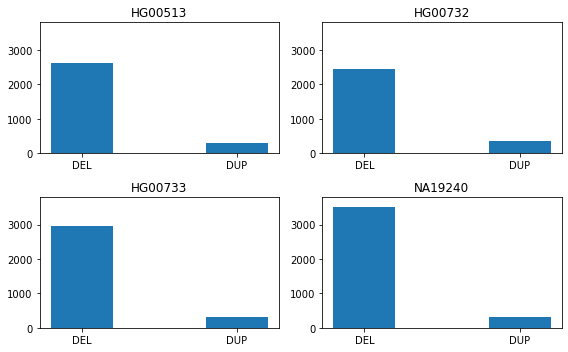

In [4]:
HG00513_cnv = {"DEL": np.sum(HG00513_labeled_data=="<DEL>"),"DUP": np.sum(HG00513_labeled_data=="<DUP>")}
HG00732_cnv = {"DEL": np.sum(HG00732_labeled_data=="<DEL>"),"DUP": np.sum(HG00732_labeled_data=="<DUP>")}
HG00733_cnv = {"DEL": np.sum(HG00733_labeled_data=="<DEL>"),"DUP": np.sum(HG00733_labeled_data=="<DUP>")}
NA19240_cnv = {"DEL": np.sum(NA19240_labeled_data=="<DEL>"),"DUP": np.sum(NA19240_labeled_data=="<DUP>")}
  
fig, ax = plt.subplots(2,2, figsize=(8,5))
 
# creating the bar plot
ax[0,0].bar(HG00513_cnv.keys(), HG00513_cnv.values(),width = 0.4)
ax[0,0].set_title("HG00513")
ax[0,0].set_ylim((0,3800))
ax[0,1].bar(HG00732_cnv.keys(), HG00732_cnv.values(),width = 0.4)
ax[0,1].set_title("HG00732")
ax[0,1].set_ylim((0,3800))
ax[1,0].bar(HG00733_cnv.keys(), HG00733_cnv.values(),width = 0.4)
ax[1,0].set_title("HG00733")
ax[1,0].set_ylim((0,3800))
ax[1,1].bar(NA19240_cnv.keys(), NA19240_cnv.values(),width = 0.4)
ax[1,1].set_title("NA19240")
ax[1,1].set_ylim((0,3800))
fig.tight_layout()
plt.show()

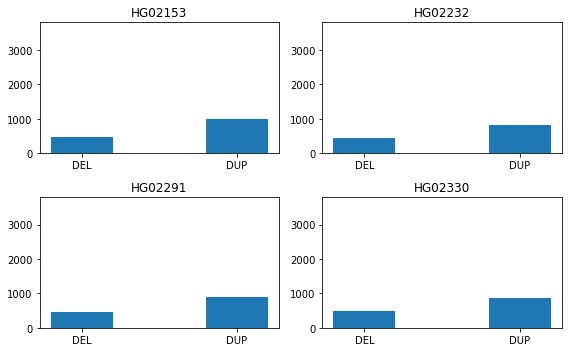

In [5]:
HG02153_cnv = {"DEL": np.sum(HG02153_labeled_data=="<DEL>"),"DUP": np.sum(HG02153_labeled_data=="<DUP>")}
HG02232_cnv = {"DEL": np.sum(HG02232_labeled_data=="<DEL>"),"DUP": np.sum(HG02232_labeled_data=="<DUP>")}
HG02291_cnv = {"DEL": np.sum(HG02291_labeled_data=="<DEL>"),"DUP": np.sum(HG02291_labeled_data=="<DUP>")}
HG02330_cnv = {"DEL": np.sum(HG02330_labeled_data=="<DEL>"),"DUP": np.sum(HG02330_labeled_data=="<DUP>")}
  
fig, ax = plt.subplots(2,2, figsize=(8,5))
 
# creating the bar plot
ax[0,0].bar(HG02153_cnv.keys(), HG02153_cnv.values(),width = 0.4)
ax[0,0].set_title("HG02153")
ax[0,0].set_ylim((0,3800))
ax[0,1].bar(HG02232_cnv.keys(), HG02232_cnv.values(),width = 0.4)
ax[0,1].set_title("HG02232")
ax[0,1].set_ylim((0,3800))
ax[1,0].bar(HG02291_cnv.keys(), HG02291_cnv.values(),width = 0.4)
ax[1,0].set_title("HG02291")
ax[1,0].set_ylim((0,3800))
ax[1,1].bar(HG02330_cnv.keys(), HG02330_cnv.values(),width = 0.4)
ax[1,1].set_title("HG02330")
ax[1,1].set_ylim((0,3800))
fig.tight_layout()
plt.show()